# 5. Filtering exercise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.morphology
from skimage import io, filters, color, morphology

image_stack = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13585/13585.tif')
image_nuclei = image_stack[0:100,0:100,2]

1. Using the skimage documentation (Google it), try to find the Sobel filter. Try it out on ```image_nuclei``` and by plotting it, try to understand what it does

2. Using the Otsu method, make a mask of the filtered image and plot it

3. Threy to erode the image. Use influence regions of different sizes and observe the effect:

4. Choose an erosion level that leaves at least one of the circles complete. Use the skeletonize filter on your resulting eroded mask

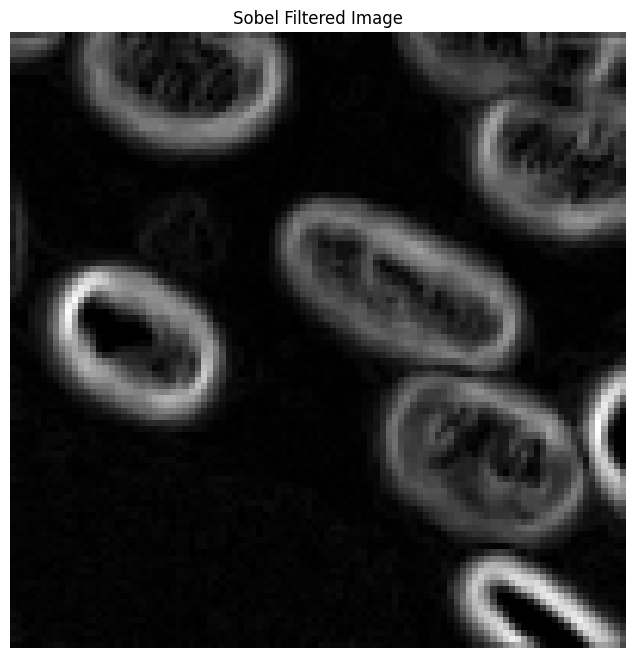

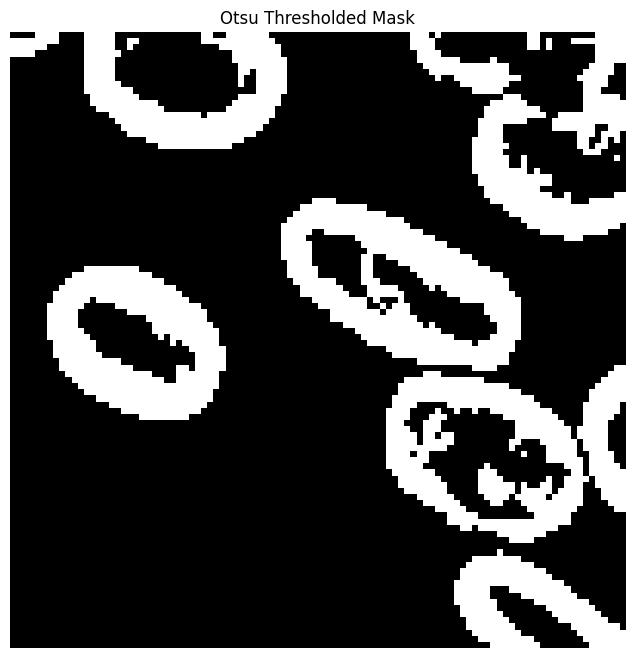

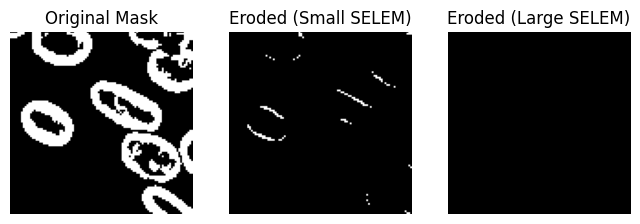

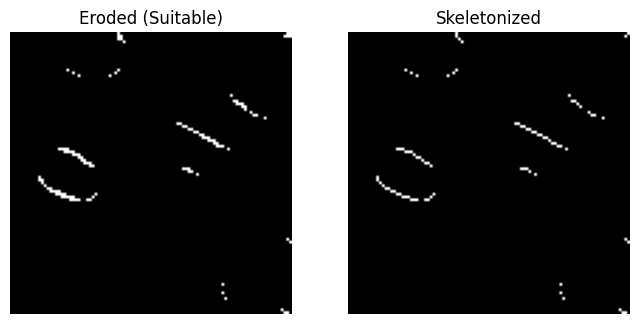

In [2]:
# 5.1. Apply the Sobel filter to image_nuclei
sobel_filtered = filters.sobel(image_nuclei)

# Plot the Sobel filtered image to understand what it does
plt.figure(figsize=(8, 8))
plt.imshow(sobel_filtered, cmap='gray')
plt.axis('off')
plt.title("Sobel Filtered Image")
plt.show()

# 5.2. Apply the Otsu method to create a mask of the filtered image
otsu_threshold = filters.threshold_otsu(sobel_filtered)
otsu_mask = sobel_filtered > otsu_threshold

# Plot the Otsu thresholded mask
plt.figure(figsize=(8, 8))
plt.imshow(otsu_mask, cmap='gray')
plt.axis('off')
plt.title("Otsu Thresholded Mask")
plt.show()

# 5.3. Erode the image using influence regions of different sizes and observe the effect
# Create a selem (structuring element) for erosion
selem_small = morphology.disk(3)  # Small structuring element
selem_large = morphology.disk(10)  # Large structuring element

# Erode the image with different structuring elements
eroded_small = morphology.erosion(otsu_mask, selem_small)
eroded_large = morphology.erosion(otsu_mask, selem_large)

# Plot the eroded images
plt.figure(figsize=(8, 8))
plt.subplot(131)
plt.imshow(otsu_mask, cmap='gray')
plt.axis('off')
plt.title("Original Mask")
plt.subplot(132)
plt.imshow(eroded_small, cmap='gray')
plt.axis('off')
plt.title("Eroded (Small SELEM)")
plt.subplot(133)
plt.imshow(eroded_large, cmap='gray')
plt.axis('off')
plt.title("Eroded (Large SELEM)")
plt.show()

# 5.4. Choose an erosion level that leaves at least one of the circles complete and use skeletonize
eroded_suitable = morphology.erosion(otsu_mask, selem_small)
skeletonized = morphology.skeletonize(eroded_suitable)

# Plot the skeletonized image
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(eroded_suitable, cmap='gray')
plt.axis('off')
plt.title("Eroded (Suitable)")
plt.subplot(122)
plt.imshow(skeletonized, cmap='gray')
plt.axis('off')
plt.title("Skeletonized")
plt.show()